You need to download the dataset from [here](https://serv.cusp.nyu.edu/projects/urbansounddataset/urbansound8k.html)

In [1]:
import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
def load_sound(path):
    raw = []
    for fp in path:
        X, _ = librosa.load(fp)
        raw.append(X)
    return raw

def plot_waves(soundnames, raw):
    i = 1
    plt.figure(figsize = (20, 60))
    for n, f in zip(soundnames, raw):
        plt.subplot(10, 1, i)
        librosa.display.waveplot(np.array(f), sr = 22050)
        plt.title(n)
        i += 1
    plt.suptitle('Figure 1: Waveplot', x = 0.5, y = 0.915, fontsize = 18)
    plt.show()
    
def plot_specgram(soundnames, raw):
    i = 1
    fig = plt.figure(figsize = (25,60))
    for n, f in zip(soundnames, raw):
        plt.subplot(10, 1, i)
        plt.specgram(np.array(f), Fs = 22050)
        plt.title(n)
        i += 1
    plt.suptitle('Figure 1: Waveplot', x = 0.5, y = 0.915, fontsize = 18)
    plt.savefig('specgram.pdf')
    plt.show()
    
def plot_logpower_specgram(soundnames, raw):
    i = 1
    plt.figure(figsize = (25, 60))
    for n, f in zip(soundnames, raw):
        plt.subplot(10, 1, i)
        D = librosa.logamplitude(np.abs(librosa.stft(f)) **2, ref_power = np.max)
        librosa.display.specshow(D, x_axis='time', y_axis = 'log')
        plt.title(n)
        i += 1
    plt.suptitle('Figure 1: Waveplot', x = 0.5, y = 0.915, fontsize = 18)
    plt.show()

In [3]:
dataset = pd.read_csv('/home/huseinzol05/Documents/UrbanSound8K/metadata/UrbanSound8K.csv')
dataset.head()

slice_file_name    fsID  start        end  salience  fold  classID  \
0    100032-3-0-0.wav  100032    0.0   0.317551         1     5        3   
1  100263-2-0-117.wav  100263   58.5  62.500000         1     5        2   
2  100263-2-0-121.wav  100263   60.5  64.500000         1     5        2   
3  100263-2-0-126.wav  100263   63.0  67.000000         1     5        2   
4  100263-2-0-137.wav  100263   68.5  72.500000         1     5        2   

              class  
0          dog_bark  
1  children_playing  
2  children_playing  
3  children_playing  
4  children_playing

In [4]:
unique_sound = np.unique(dataset.iloc[:, -1])
unique_sound

array(['air_conditioner', 'car_horn', 'children_playing', 'dog_bark',
       'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren',
       'street_music'], dtype=object)

In [5]:
path = '/home/huseinzol05/Documents/UrbanSound8K/audio/fold'
location, names = [], []
for i in xrange(unique_sound.shape[0]):
    sound = dataset.loc[dataset['class'] == unique_sound[i]].iloc[0, :]
    location.append(path + str(sound['fold']) + '/' + str(sound['slice_file_name']))
    names.append(str(unique_sound[i]))

In [6]:
raw = load_sound(location)

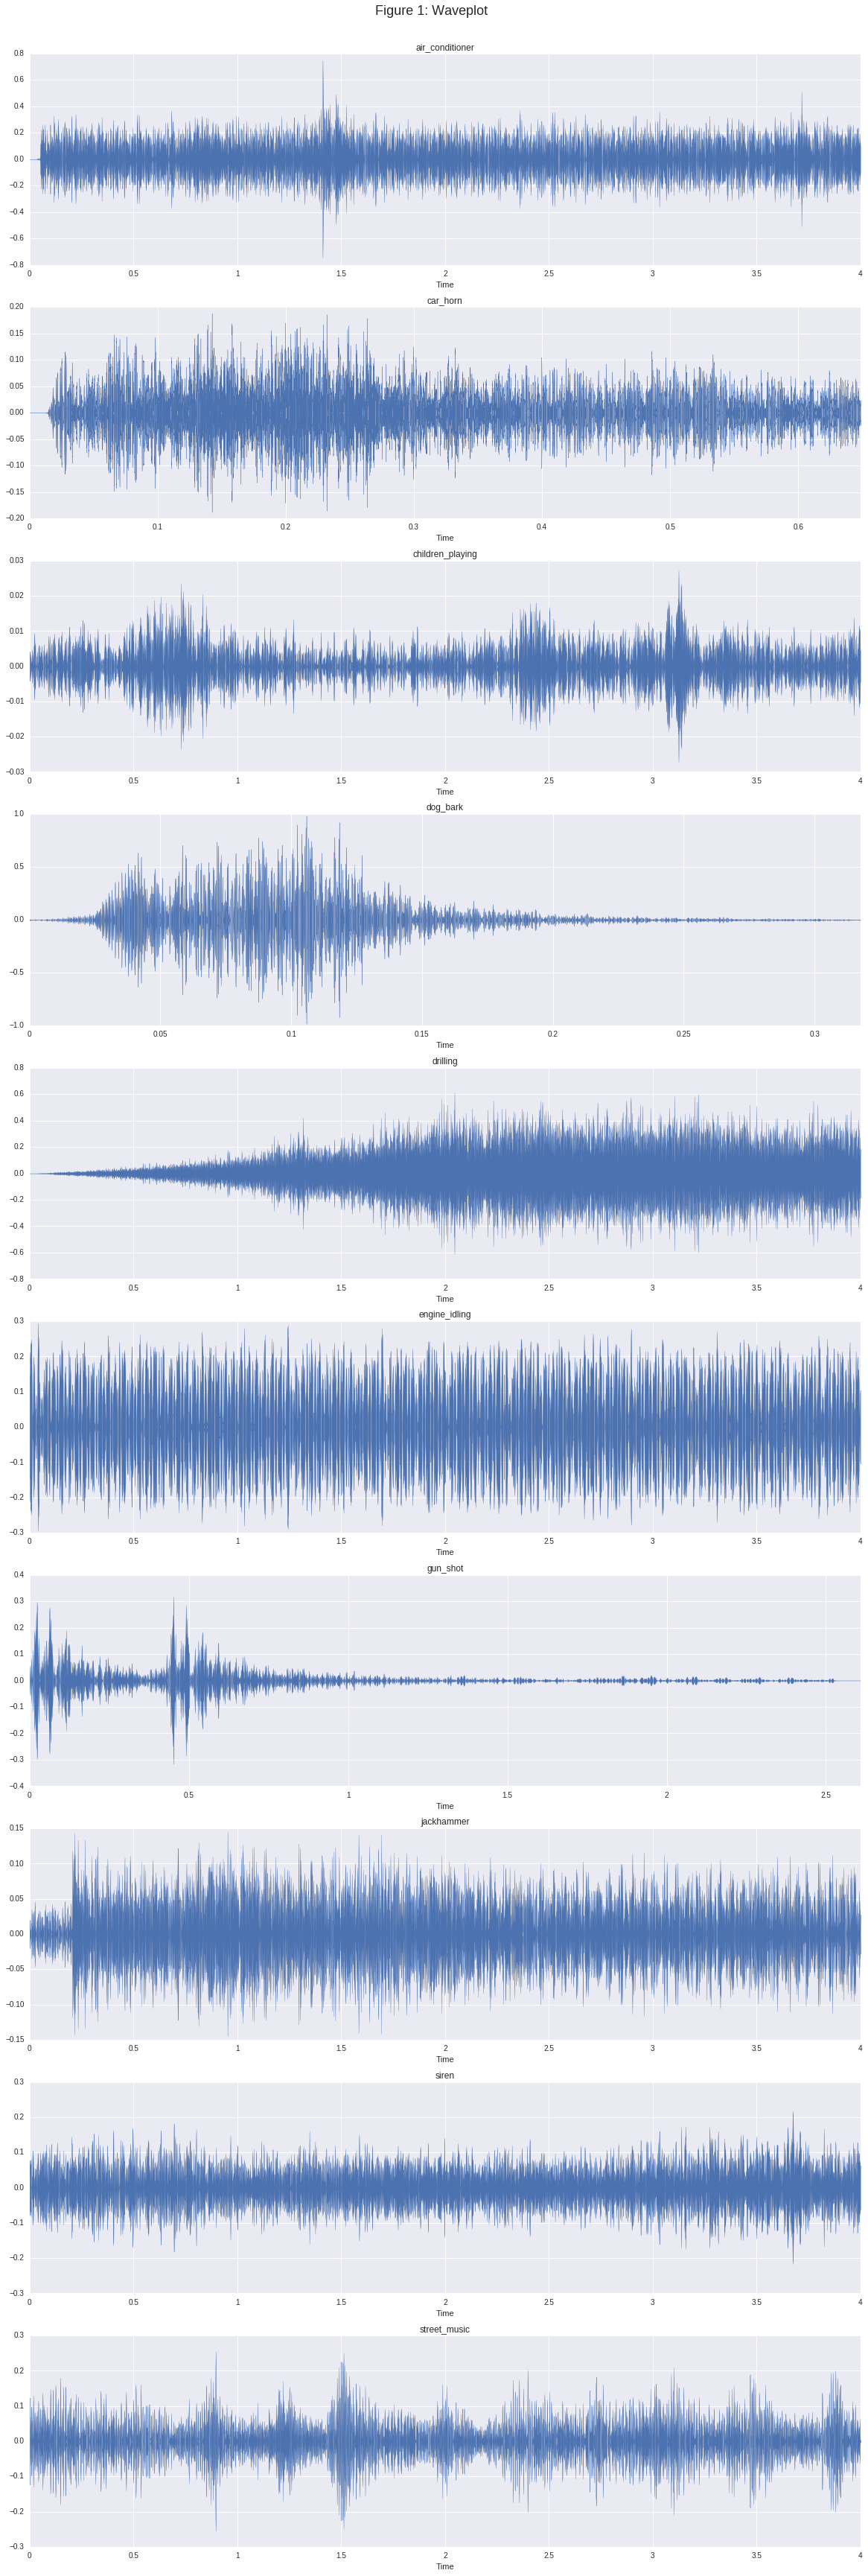

In [7]:
plot_waves(names, raw)

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:7042: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


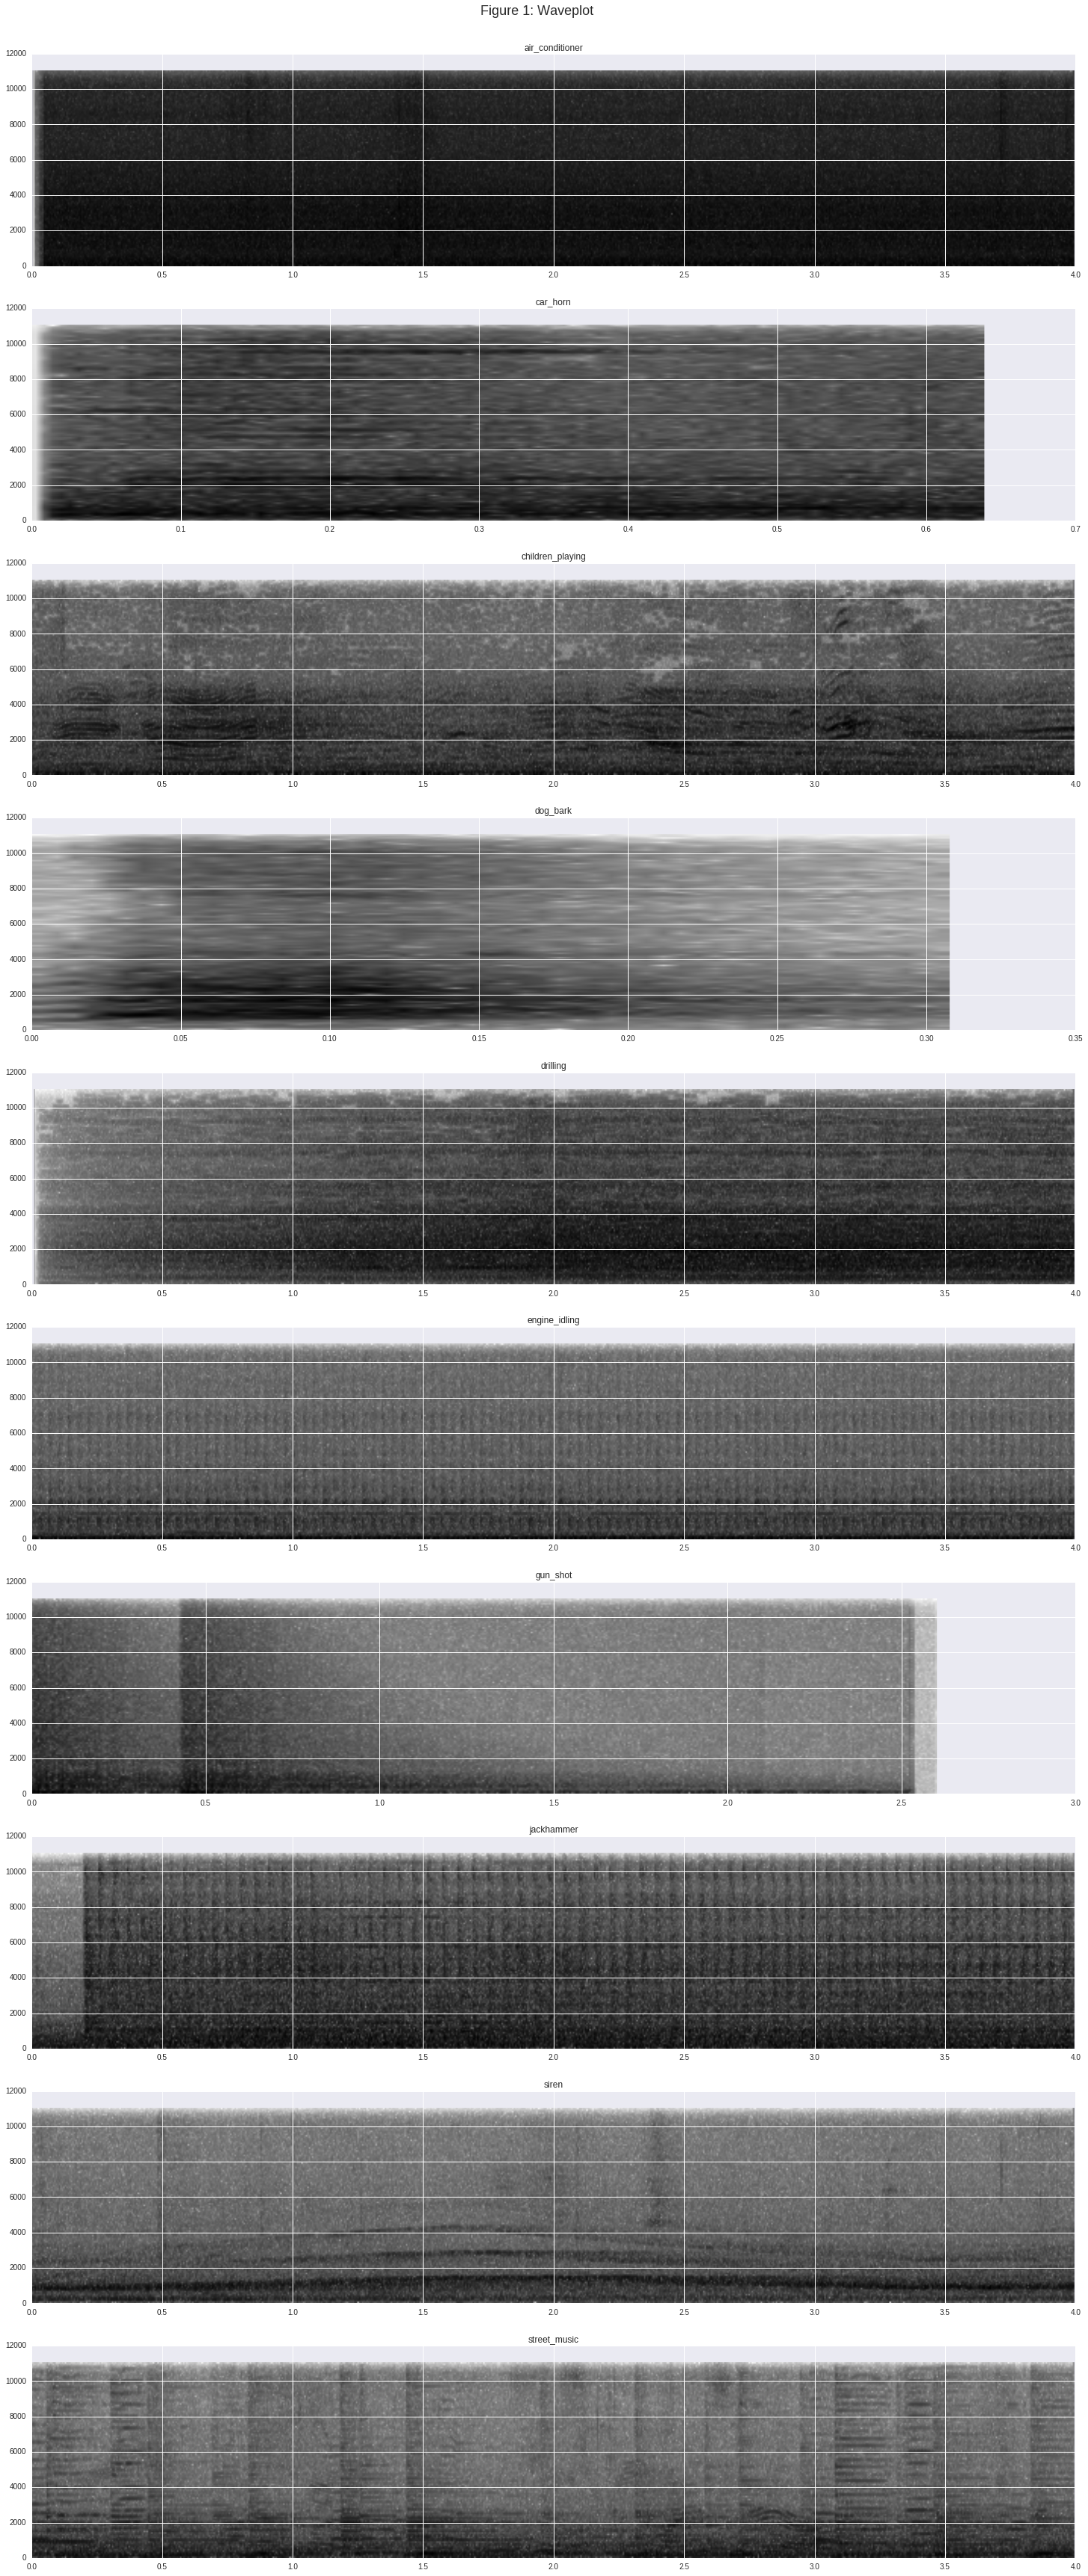

In [8]:
plot_specgram(names, raw)

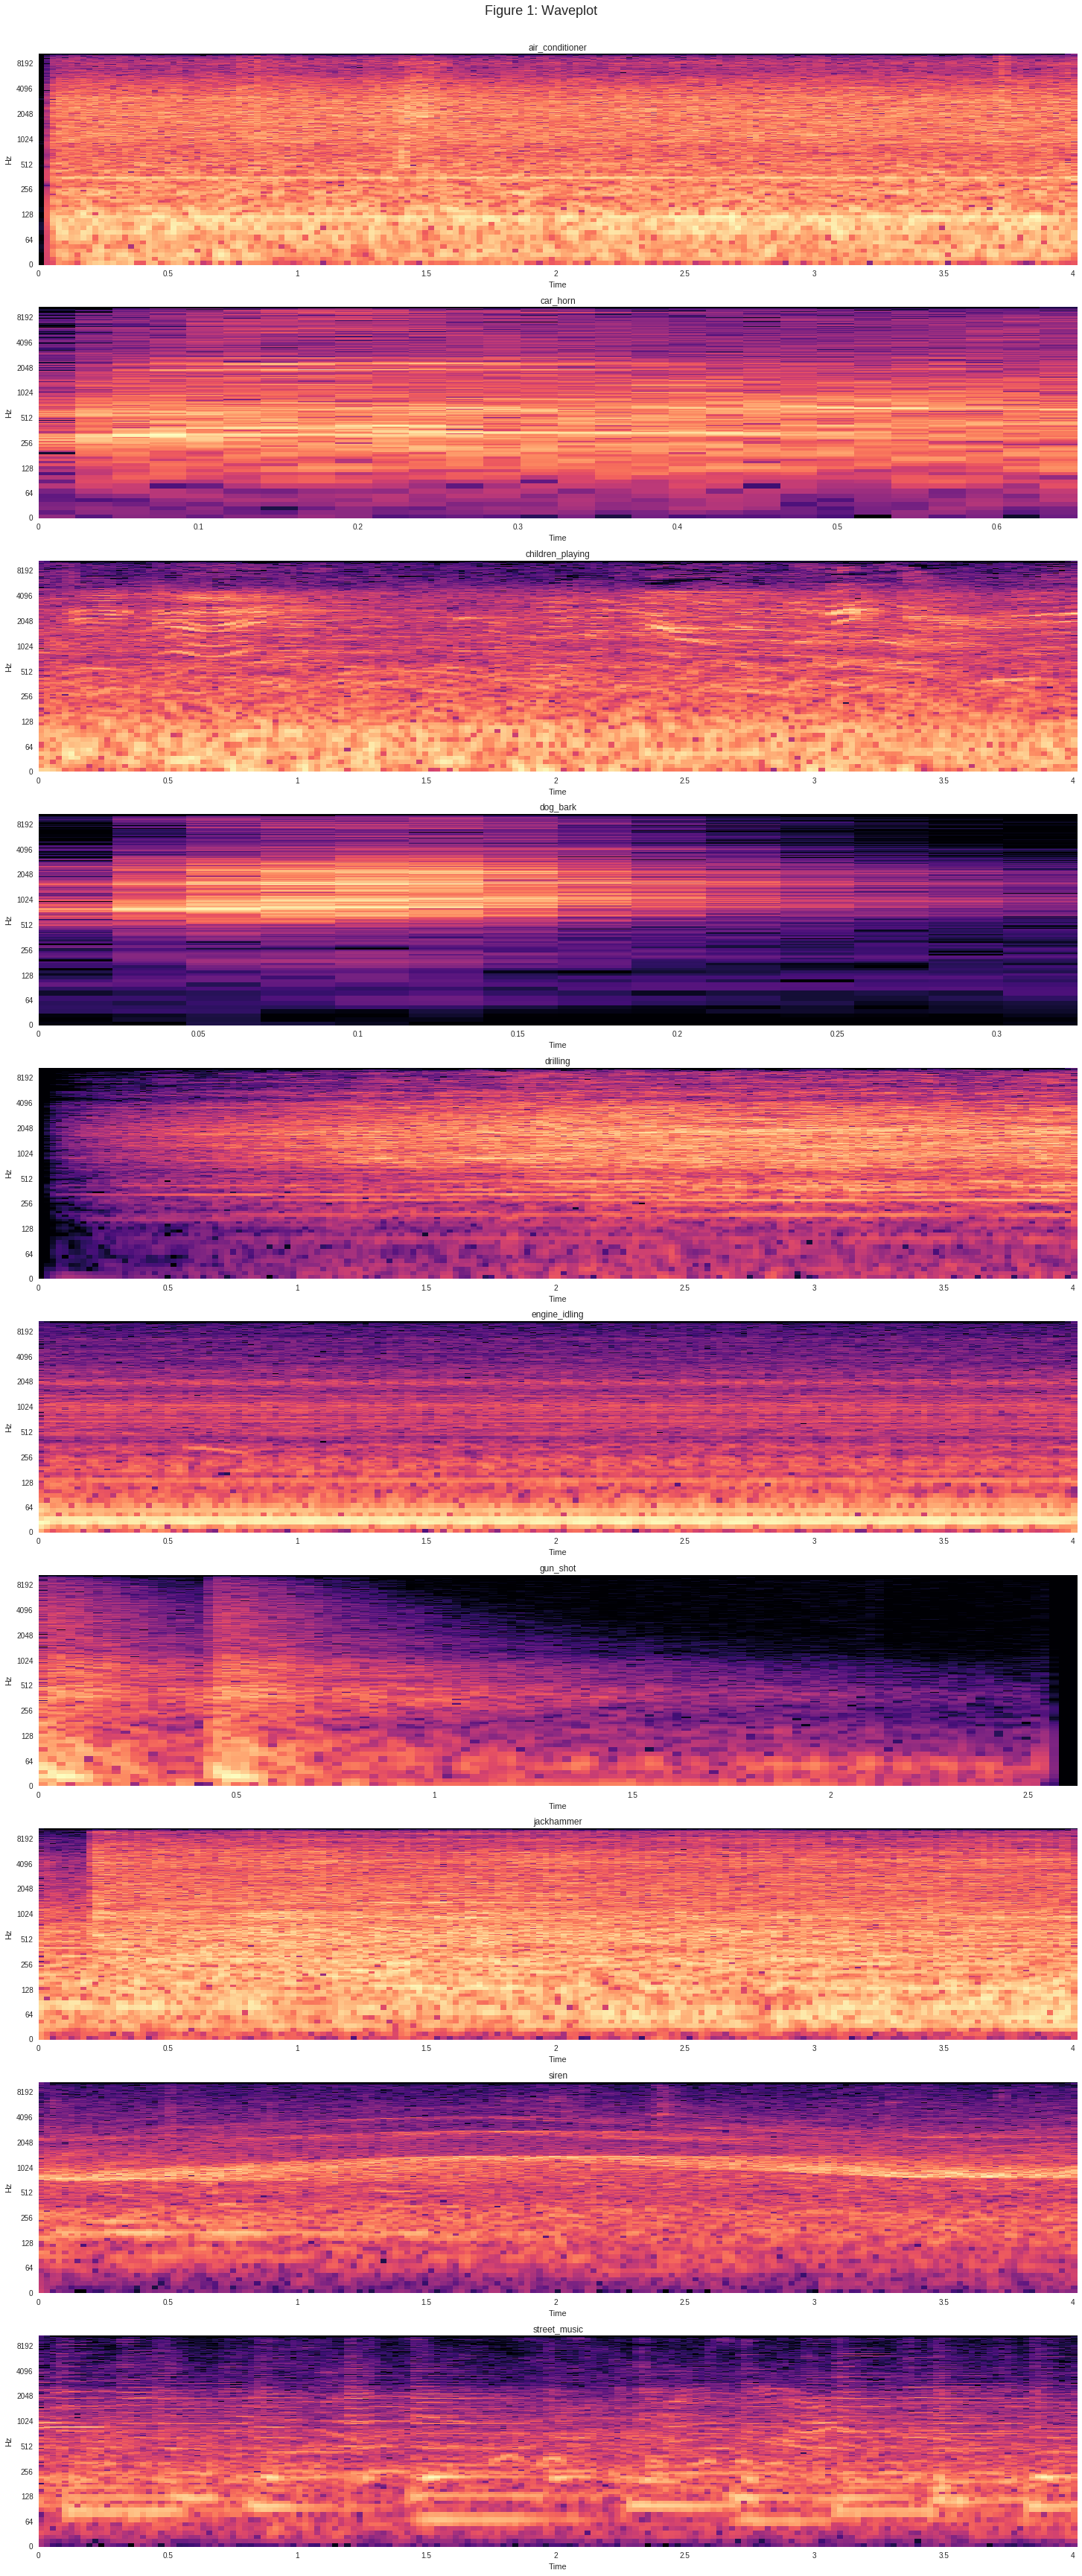

In [10]:
plot_logpower_specgram(names, raw)